In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from datasets import load_dataset

dataset = load_dataset("ag_news")

Non-Negative Matrix Factorization foloseste o matrice de termeni-documente pentru a extrage caracteristici semnificative ale documentelor
Convertim dataset-ul intr-o astfel de matrice

In [83]:
tfidf_vectorizer = TfidfVectorizer(#max_df=0.9,            # Proporția maximă de documente în care un termen poate apărea pentru a fi inclus în matricea TF-IDF.
                                   #min_df=1,              # Numărul minim de documente în care un termen trebuie să apară pentru a fi inclus în matricea TF-IDF.
                                   #max_features=10000,     # Numărul maxim de termeni (caracteristici) care să fie incluse în matricea TF-IDF
                                   stop_words='english')  # Punctiatie setata pentru limba engleza
tfidf = tfidf_vectorizer.fit_transform(dataset['train']['text'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_test = tfidf_vectorizer.transform(dataset['test']['text'])

# Numarul de topicuri pe care dorim sa le identificam
no_topics = 7

lda = LatentDirichletAllocation(n_components=no_topics, random_state=77777).fit(tfidf)

Vizualizarea Topicelor + Evaluare(Perplexity)

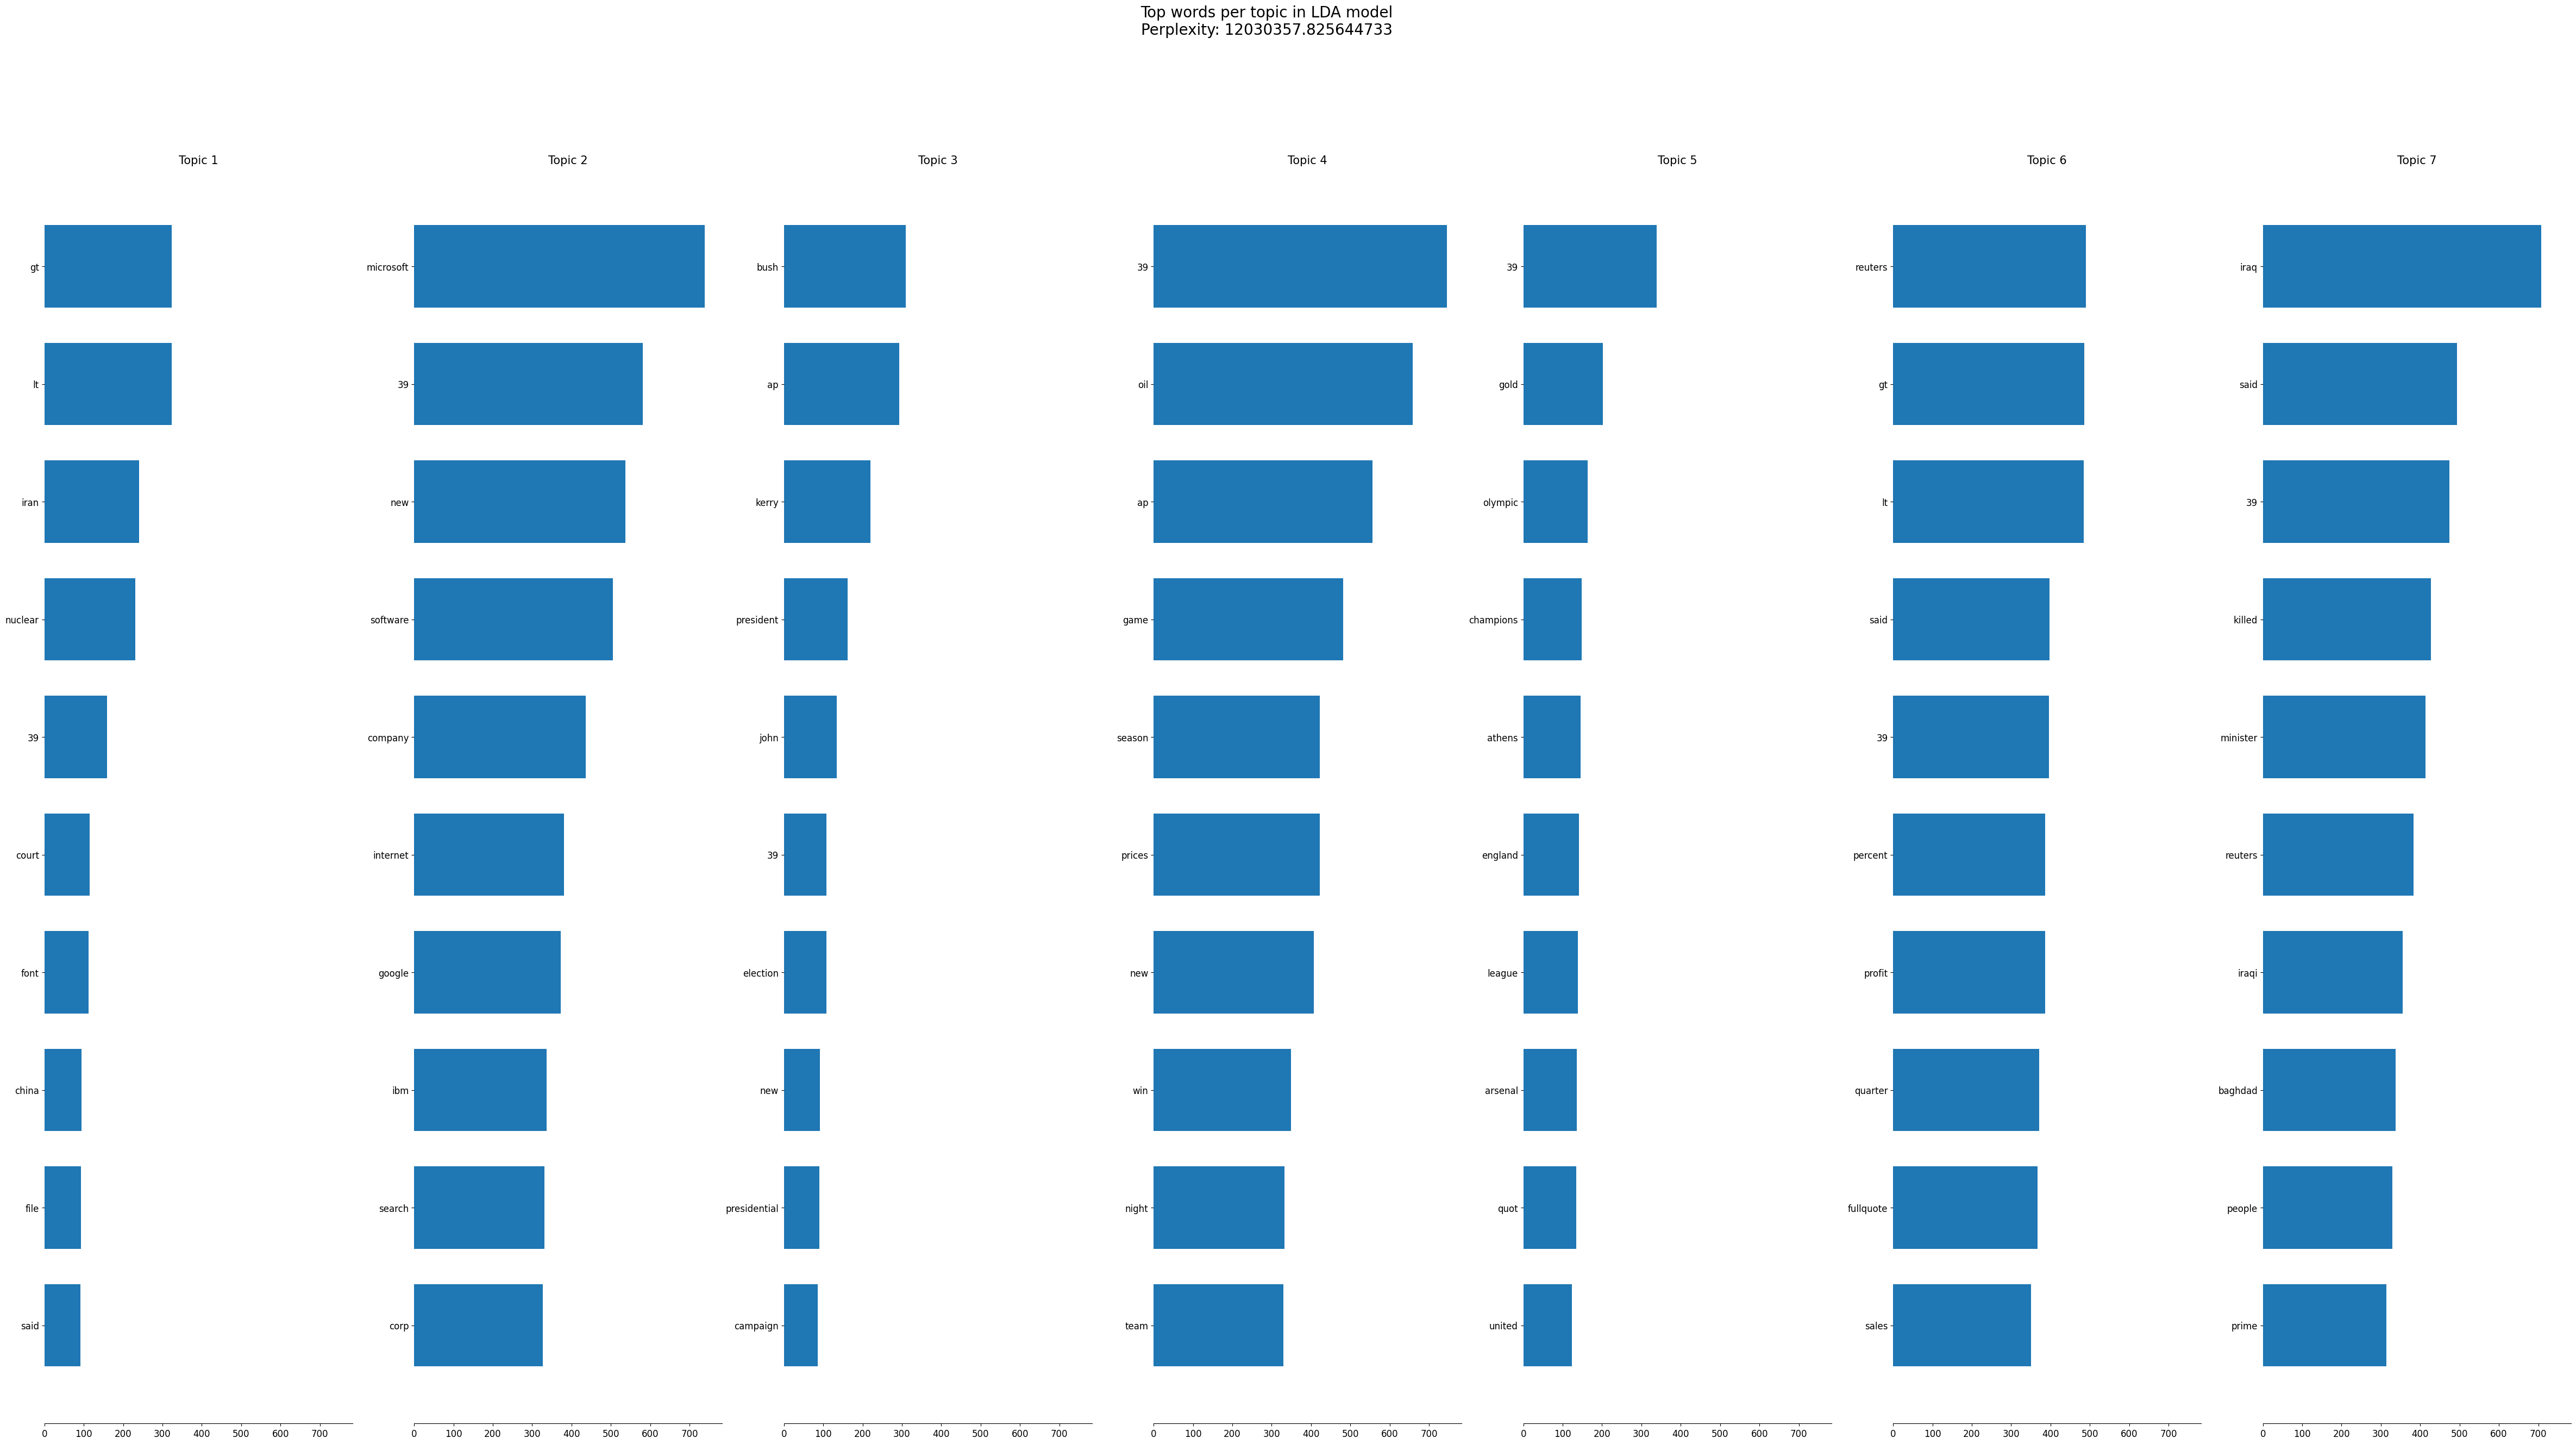

In [84]:
import matplotlib.pyplot as plt

def plot_topics(model, feature_names, no_top_words):
    fig, axes = plt.subplots(1, model.components_.shape[0], figsize=(60, 30), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_indices]
        weights = topic[top_indices]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(f'Top words per topic in LDA model\nPerplexity: {lda.perplexity(tfidf_test)}', fontsize=20)
        
    plt.subplots_adjust()
    plt.show()
        

no_top_words = 10
plot_topics(lda, tfidf_feature_names, no_top_words)